In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import numpy as np

df = pd.concat(pd.read_excel("Dados/201906.xlsx", sheet_name=None), ignore_index=True)
df["Unnamed: 15"].update(df["Unnamed: 16"])
df["Unnamed: 10"].update(df["Unnamed: 11"])
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo", "Unnamed: 10" : "Nr Litros", "Unnamed: 4" : "Lançamento", "Valor        Numero Abast." : "Valor Abast."})
df = df.drop(["Unnamed: 8", "Lançamento"], axis = 1)
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Data,Nr Frota,Placa,Produto,Tipo,Nr Litros,Valor Abast.
0,03/06/2019,93018,ATW-9367,GASOLINA,Abast,7.169,32.20
1,03/06/2019,77108,AAW-6887,GASOLINA,Abast,31.570,141.76
2,03/06/2019,79506,AHR-1214,GASOLINA,Abast,35.560,159.67
3,03/06/2019,77109,AAW-6734,GASOLINA,Abast,34.430,154.60
4,03/06/2019,78012,AKF-2842,DIESEL,Abast,102.671,368.60
...,...,...,...,...,...,...,...
209,27/06/2019,79457,BCC-4713,GASOLINA,Abast,36.595,150.00
210,27/06/2019,77108,AAW-6887,GASOLINA,Abast,35.660,152.99
211,27/06/2019,79467,BCD-6528,GASOLINA,Abast,38.810,166.50
212,27/06/2019,79446,ATL-9841,GASOLINA,Abast,41.270,177.06


In [2]:
df["Nr Litros"].mean()
#df["Valor Abast."].std()
#df["Valor Ajustado"].std()

46.6198130841121

In [3]:
df.columns

Index(['Data', 'Nr Frota', 'Placa', 'Produto', 'Tipo', 'Nr Litros',
       'Valor Abast.'],
      dtype='object')

In [4]:
df.sort_values(by="Nr Litros")

,Data,Nr Frota,Placa,Produto,Tipo,Nr Litros,Valor Abast.
86,12/06/2019,93011,ATW-9412,GASOLINA,Abast,5.600,24.59
130,17/06/2019,93011,ATW-9412,GASOLINA,Abast,5.820,25.56
208,27/06/2019,79437,ASZ-7083,GASOLINA,Abast,6.091,26.14
10,03/06/2019,93011,ATW-9412,GASOLINA,Abast,6.149,27.62
179,25/06/2019,93011,ATW-9412,GASOLINA,Abast,6.221,27.32
...,...,...,...,...,...,...,...
77,11/06/2019,79473,AJU-6529,DIESEL,Abast,120.070,431.06
205,27/06/2019,31093,AZL-3509,DIESEL,Abast,147.220,528.53
71,10/06/2019,31093,AZL-3509,DIESEL,Abast,169.720,609.30
102,13/06/2019,31102,AZR-9543,DIESEL,Abast,198.521,712.70


In [5]:
df[df["Nr Litros"] > df["Nr Litros"].mean()].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Produto,Tipo,Nr Litros,Valor Abast.
140,18/06/2019,31093,AZL-3509,DIESEL,Abast,214.660,770.64
102,13/06/2019,31102,AZR-9543,DIESEL,Abast,198.521,712.70
71,10/06/2019,31093,AZL-3509,DIESEL,Abast,169.720,609.30
205,27/06/2019,31093,AZL-3509,DIESEL,Abast,147.220,528.53
77,11/06/2019,79473,AJU-6529,DIESEL,Abast,120.070,431.06
...,...,...,...,...,...,...,...
54,07/06/2019,79466,BCD-6527,ETANOL,Abast,47.313,132.00
74,11/06/2019,79453,BCC-4701,ETANOL,Abast,47.195,131.67
207,27/06/2019,79440,ATM-6450,GASOLINA,Abast,47.170,202.37
135,18/06/2019,79446,ATL-9841,GASOLINA,Abast,47.130,206.91


In [6]:
df[(df["Nr Litros"] > df["Nr Litros"].mean()) & (df["Produto"] == "GASOLINA")].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Produto,Tipo,Nr Litros,Valor Abast.
138,18/06/2019,79422,AJN-3794,GASOLINA,Abast,55.080,241.81
197,26/06/2019,79452,BCC-4699,GASOLINA,Abast,51.980,223.00
103,13/06/2019,79444,ATL-9834,GASOLINA,Abast,51.540,226.27
52,07/06/2019,77097,AAW-2629,GASOLINA,Abast,51.441,230.98
173,24/06/2019,79445,ATL-9829,GASOLINA,Abast,50.800,223.02
188,26/06/2019,79454,BCC-4702,GASOLINA,Abast,49.559,212.62
156,19/06/2019,79421,AJN-3792,GASOLINA,Abast,49.370,216.74
133,18/06/2019,79413,AHQ-1425,GASOLINA,Abast,49.251,216.22
134,18/06/2019,92046,ALE-6725,GASOLINA,Abast,49.221,216.09
189,26/06/2019,79455,BCC-4703,GASOLINA,Abast,48.510,208.12


In [7]:
df["Produto"].value_counts()

GASOLINA    113
ETANOL       58
DIESEL       43
Name: Produto, dtype: int64

In [8]:
df["Produto"].value_counts(normalize=True)

GASOLINA    0.528037
ETANOL      0.271028
DIESEL      0.200935
Name: Produto, dtype: float64

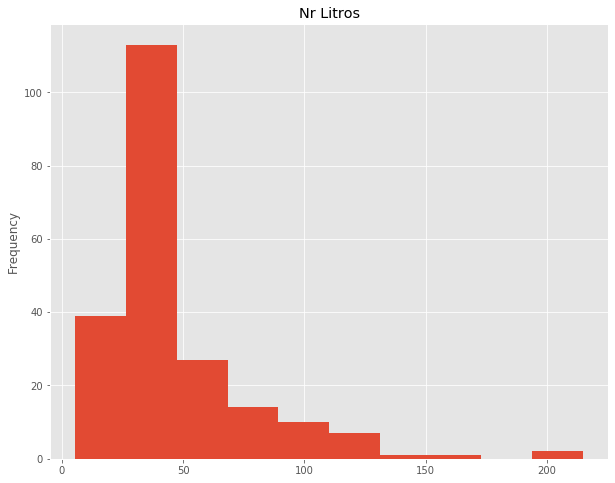

In [34]:
#Ploting
plt.rcParams.update({'font.size': 10, 'figure.figsize': (10, 8)})
#Gráfico de barras em relação ao número de litros
df["Nr Litros"].plot(kind='hist', title="Nr Litros")

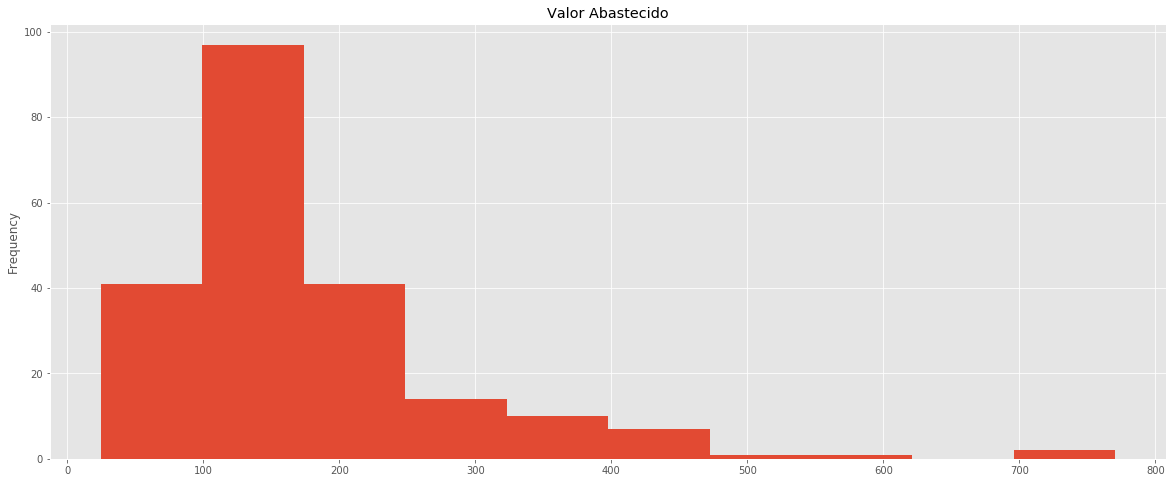

In [33]:
df["Valor Abast."].plot(kind='hist', title = "Valor Abastecido")

In [11]:
df["Nr Litros"].describe()

count    214.000000
mean      46.619813
std       31.526975
min        5.600000
25%       32.521000
50%       41.988500
75%       48.694500
max      214.660000
Name: Nr Litros, dtype: float64

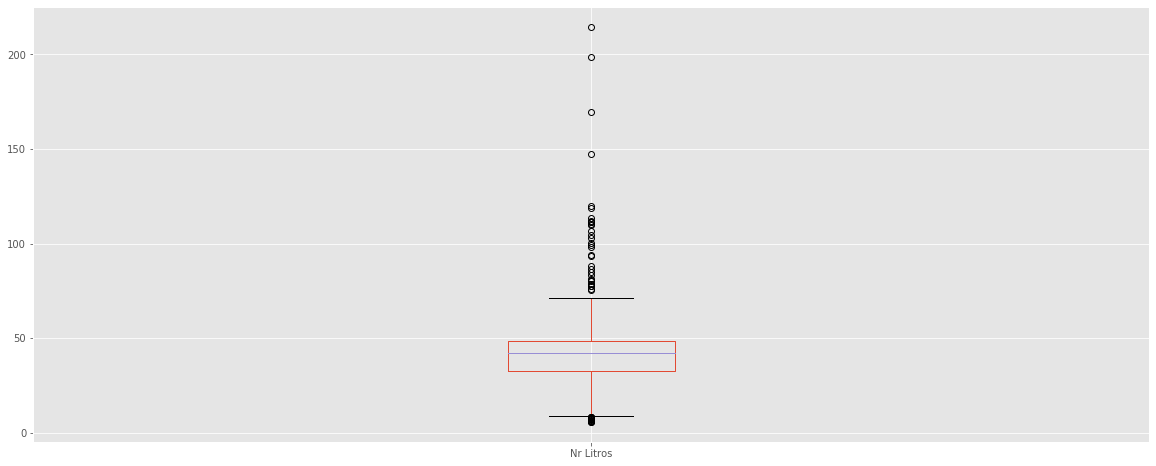

In [32]:
df["Nr Litros"].plot(kind="box")

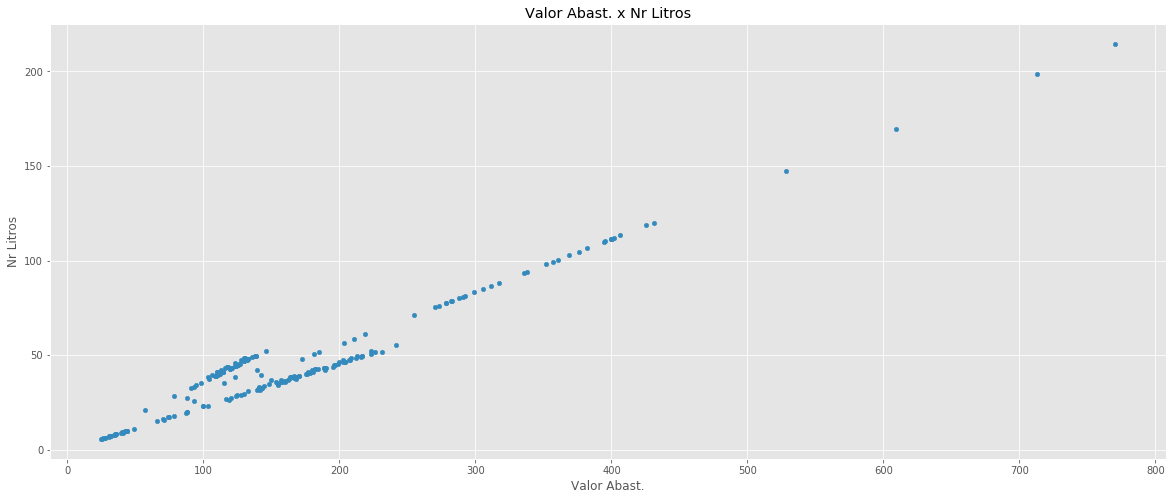

In [31]:
df.plot(kind='scatter', x = "Valor Abast.", y="Nr Litros", title="Valor Abast. x Nr Litros")

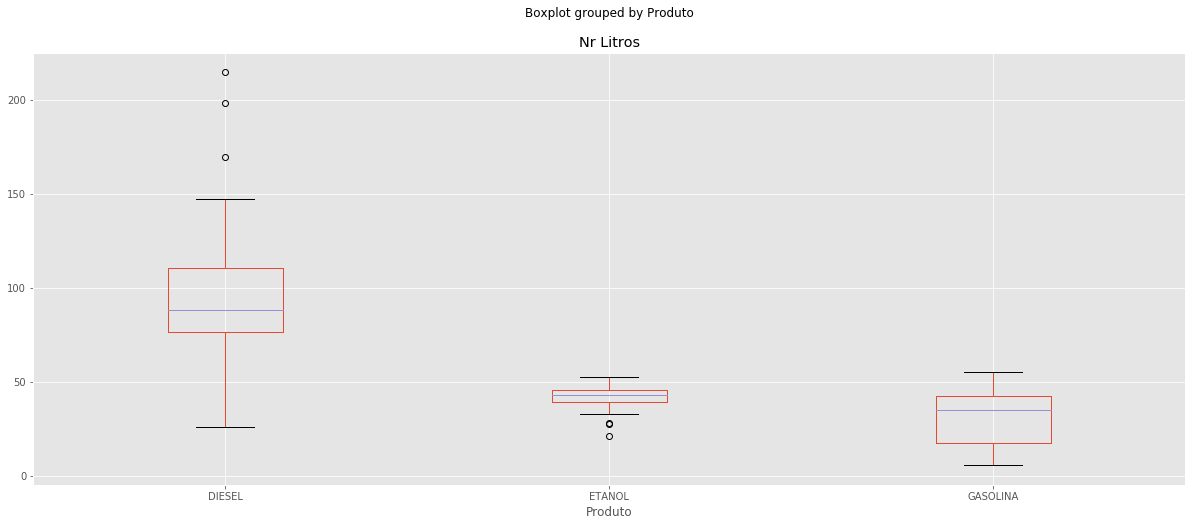

In [30]:
df.boxplot(column="Nr Litros", by="Produto")

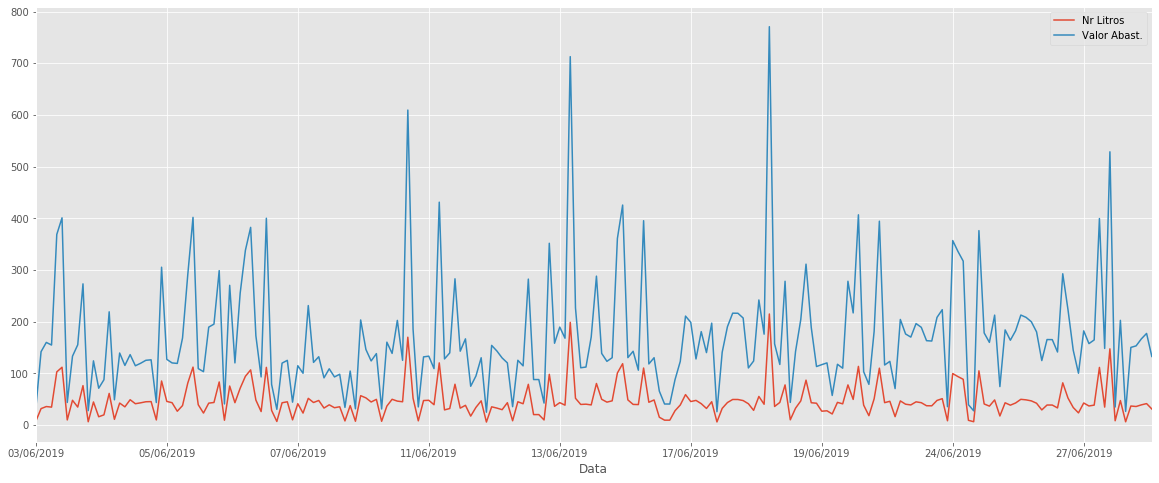

In [29]:
plt.rcParams.update({'font.size': 10, 'figure.figsize': (20, 8)})
ax = plt.gca()
df.plot(kind='line', x = "Data", y = "Nr Litros", ax=ax)
df.plot(kind='line', x = "Data", y = "Valor Abast.", ax=ax)

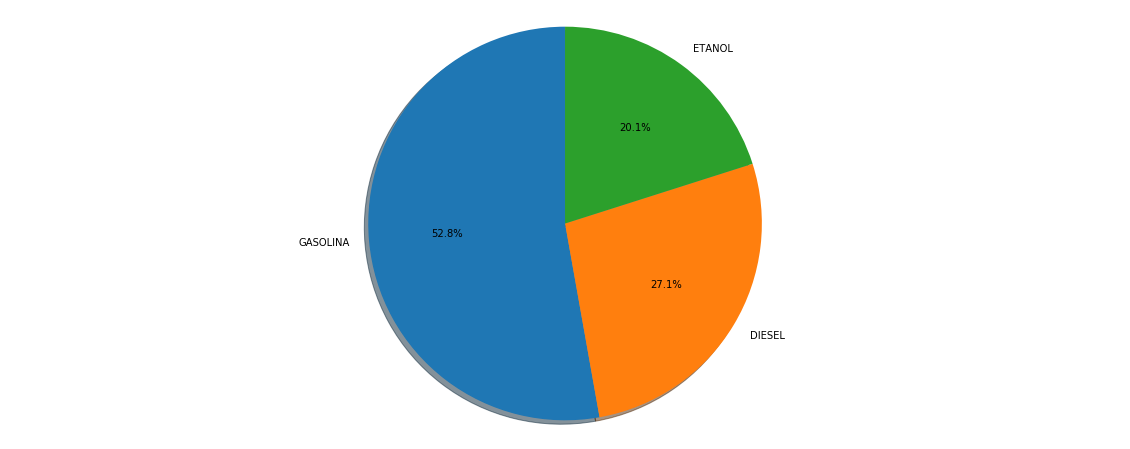

In [16]:
labels = df["Produto"].unique()
sizes = df["Produto"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

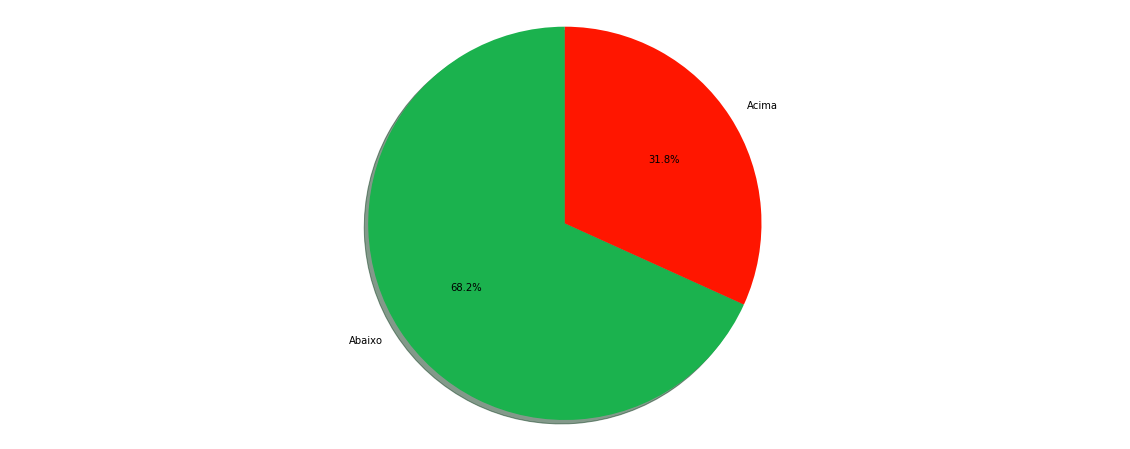

In [17]:
labels = ["Abaixo", "Acima"]
teste = df["Nr Litros"] >= df["Nr Litros"].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, colors=['#1BB24E', '#FF1600'], autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

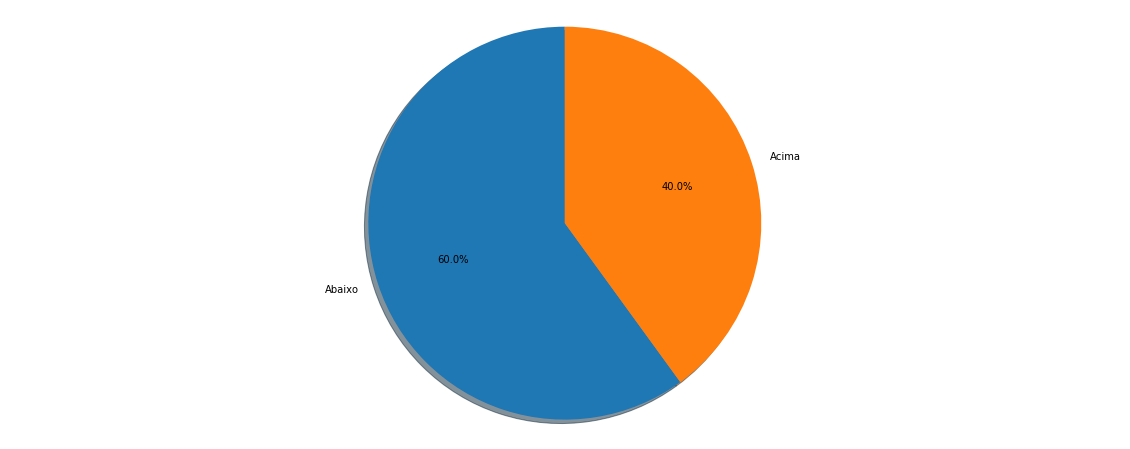

In [18]:
labels = ["Abaixo", "Acima"]
teste = df["Placa"].value_counts() >= df["Placa"].value_counts().mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

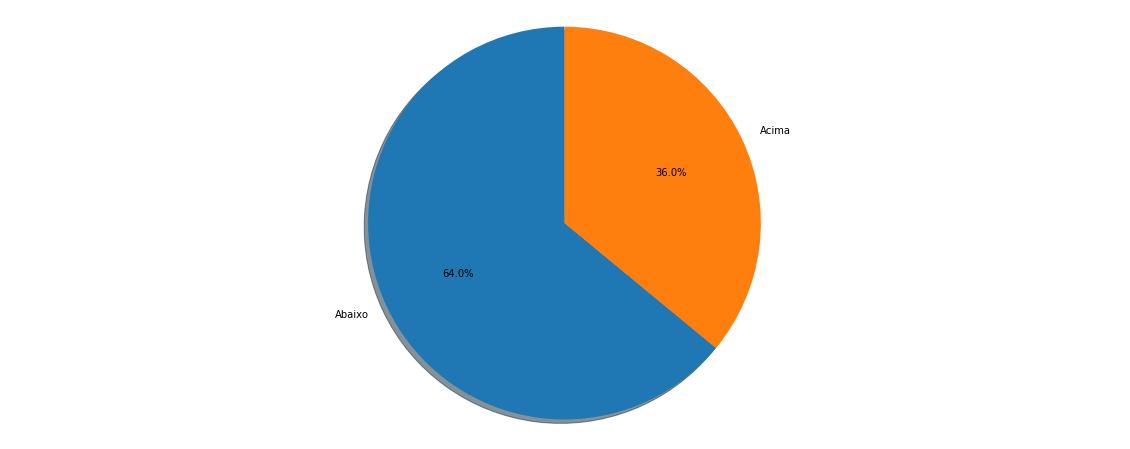

In [19]:
labels = ["Abaixo", "Acima"]
teste = df["Valor Abast."] >= df["Valor Abast."].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

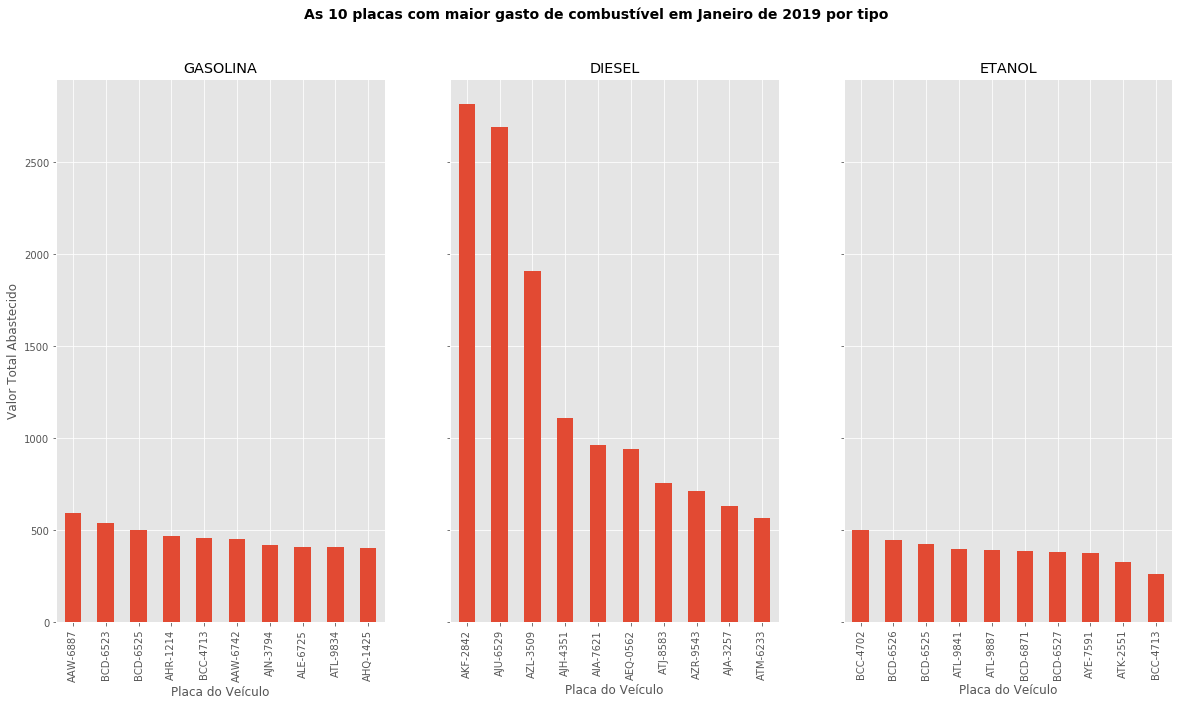

In [20]:
top_10_g = df[df["Produto"] == "GASOLINA"]
top_10_d = df[df["Produto"] == "DIESEL"]
top_10_e = df[df["Produto"] == "ETANOL"]
#set ggplot style
plt.style.use('ggplot')

#plot data GASOLINA
top_10_g = (top_10_g.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_g.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data DIESEL
top_10_d = (top_10_d.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_d.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data ETANOL
top_10_e = (top_10_e.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_e.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot the data and get the average
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(20, 10))
#plot GASOLINA
top_10_g.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='GASOLINA', xlabel='Placa do Veículo', ylabel='Valor Total Abastecido')
#plot DIESEL
top_10_d.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax1)
ax1.set(title='DIESEL', xlabel='Placa do Veículo', ylabel='')
#plot ETANOL
top_10_e.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax2)
ax2.set(title='ETANOL', xlabel='Placa do Veículo', ylabel='')

#set limits and labels
#ax.set(title='As 10 placas com maior gasto de combustível em Janeiro de 2019 por tipo', xlabel='Placa do Veículo', ylabel='Valor Abastecido Total')
fig.suptitle('As 10 placas com maior gasto de combustível em Janeiro de 2019 por tipo', fontsize=14, fontweight='bold')
    
#hide the legend
ax2.legend().set_visible(False)
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

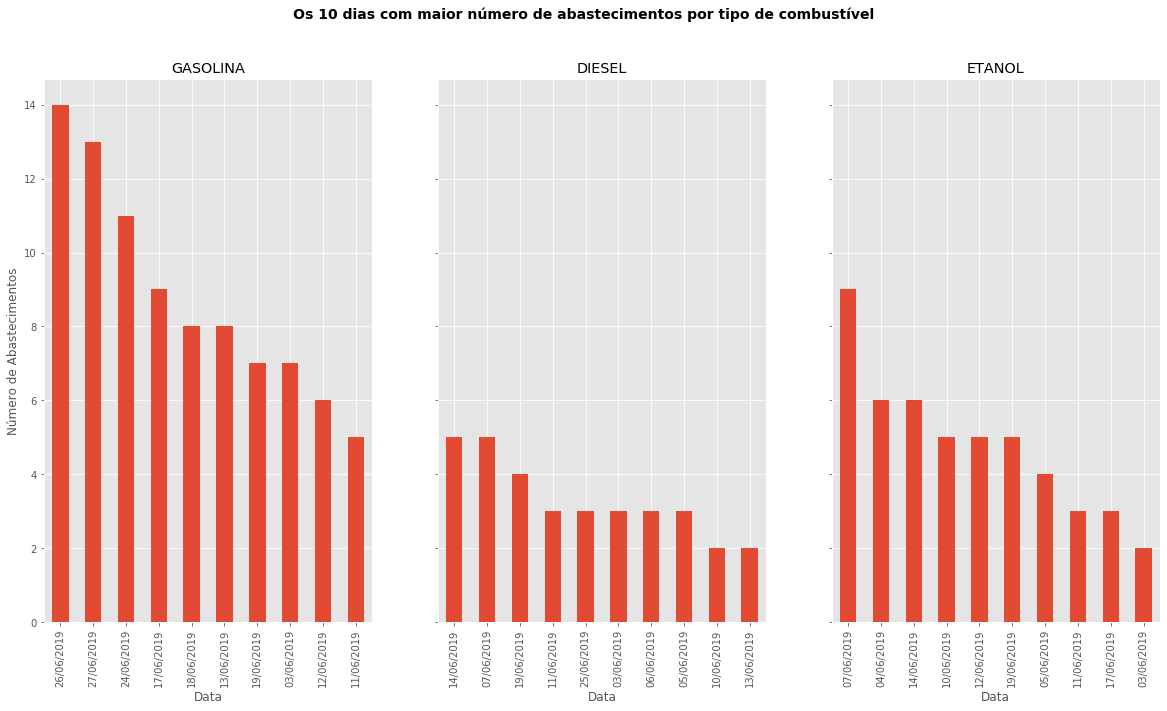

In [21]:
top_10_g = df[df["Produto"] == "GASOLINA"]
top_10_d = df[df["Produto"] == "DIESEL"]
top_10_e = df[df["Produto"] == "ETANOL"]

#set ggplot style
plt.style.use('ggplot')

#plot data GASOLINA
top_10_g = (top_10_g.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_g.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data DIESEL
top_10_d = (top_10_d.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_d.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data ETANOL
top_10_e = (top_10_e.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_e.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(20, 10))

#plot GASOLINA
top_10_g.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax0)
ax0.set(title="GASOLINA", xlabel='Data', ylabel='Número de Abastecimentos')

#plot DIESEL
top_10_d.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax1)
ax1.set(title="DIESEL", xlabel='Data', ylabel='')

#plot ETANOL
top_10_e.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax2)
ax2.set(title="ETANOL", xlabel='Data', ylabel='')

#set limits and labels
fig.suptitle('Os 10 dias com maior número de abastecimentos por tipo de combustível', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)

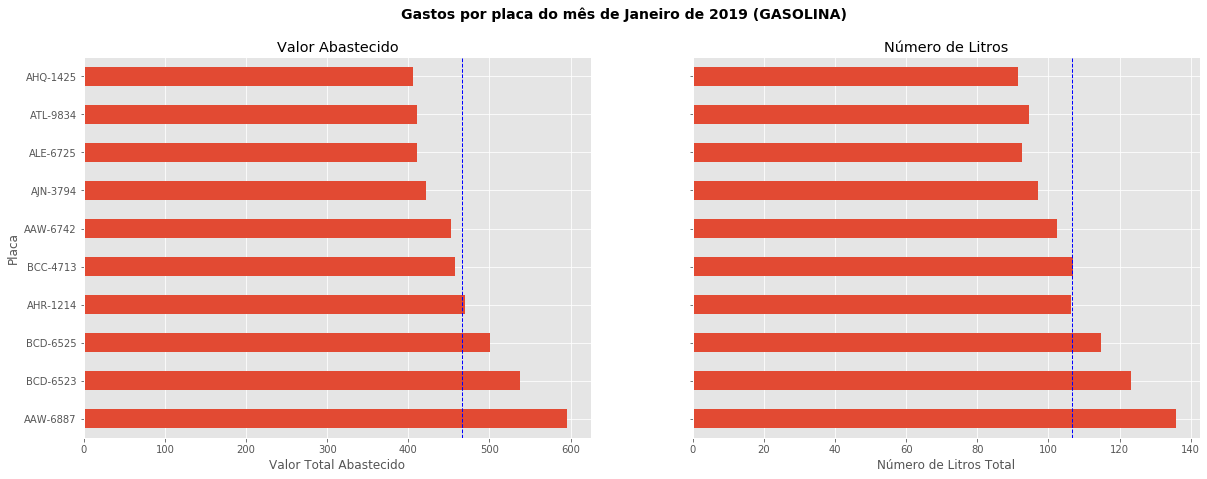

In [22]:
#get the figure and the axes
top_10 = df[df["Produto"] == "GASOLINA"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019 (GASOLINA)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

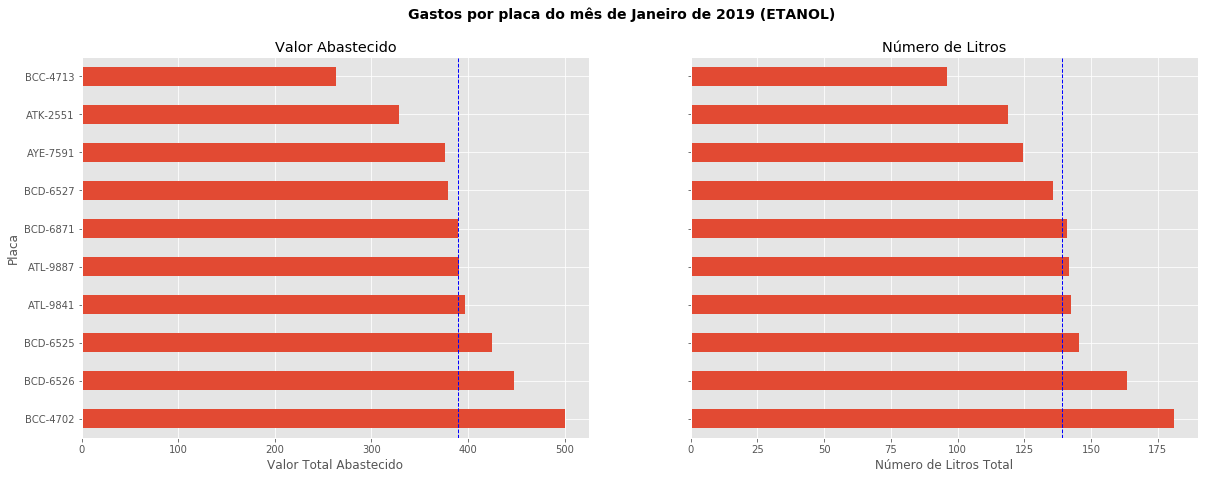

In [23]:
#get the figure and the axes
top_10 = df[df["Produto"] == "ETANOL"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019 (ETANOL)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

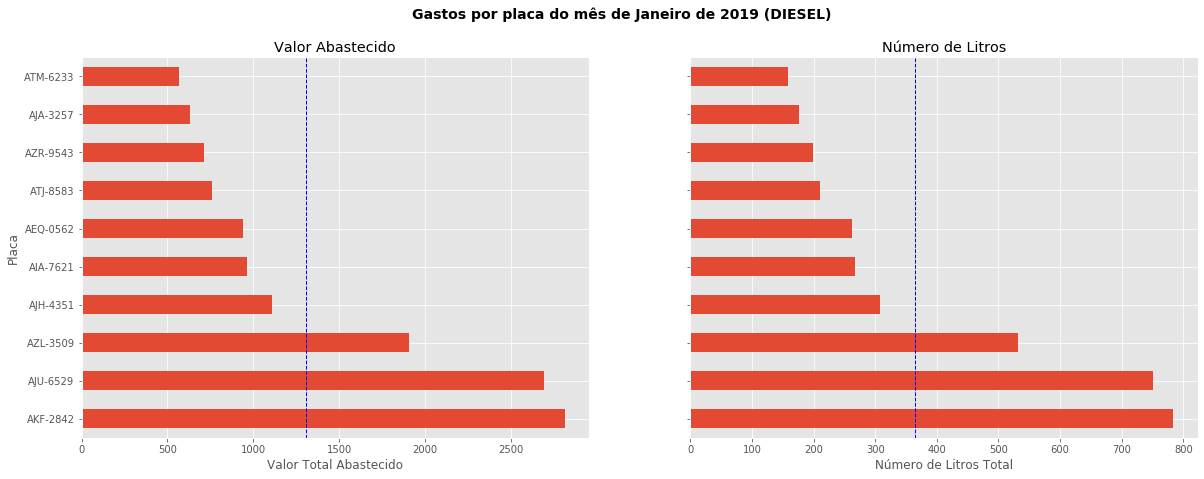

In [24]:
#get the figure and the axes
top_10 = df[df["Produto"] == "DIESEL"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019 (DIESEL)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

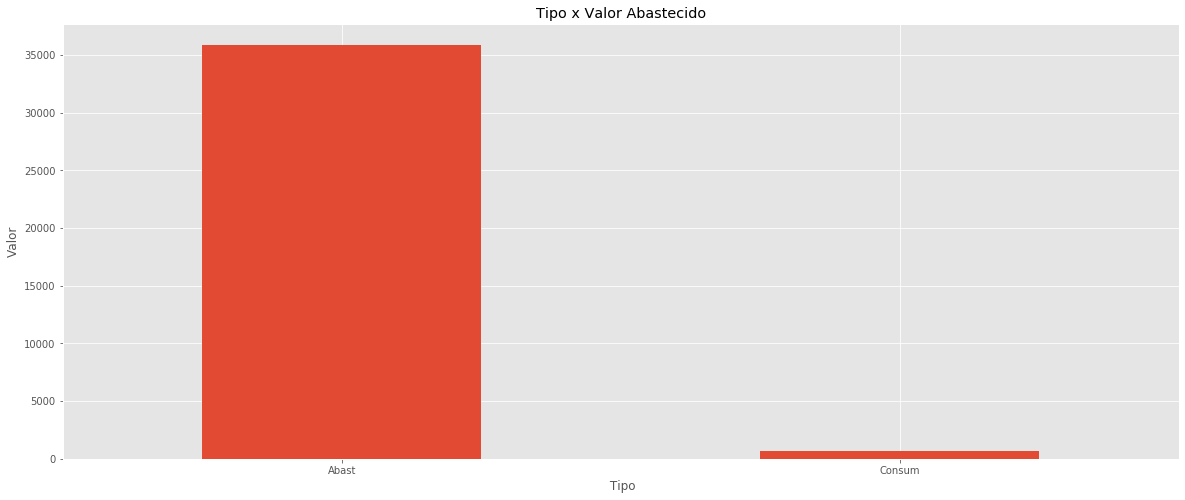

In [25]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Tipo')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Tipo': 'Tipo', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots()

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Tipo", rot = 0, ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='Tipo x Valor Abastecido', xlabel=' Tipo', ylabel='Valor')

#hide the legend
ax.legend().set_visible(False)

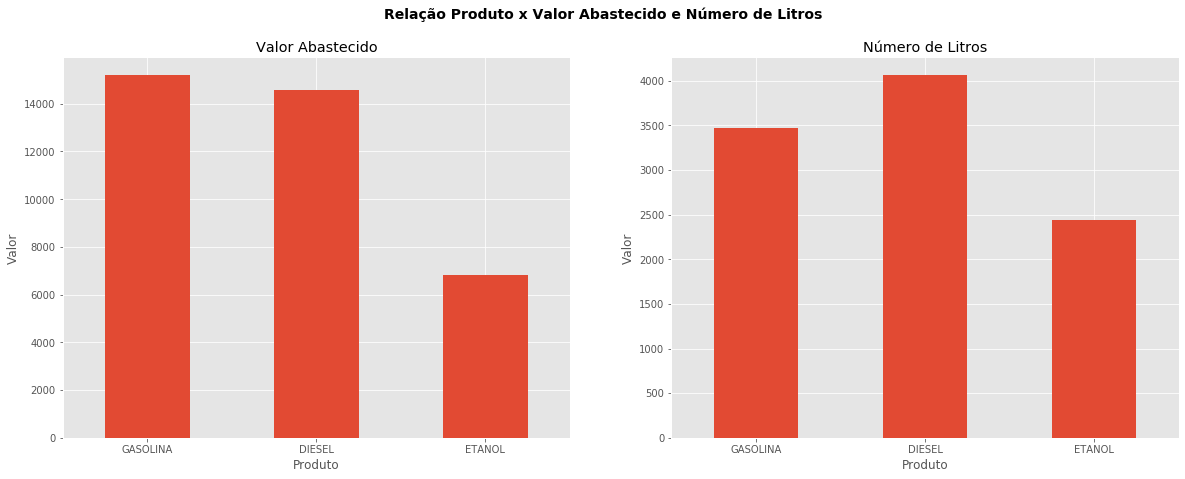

In [26]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

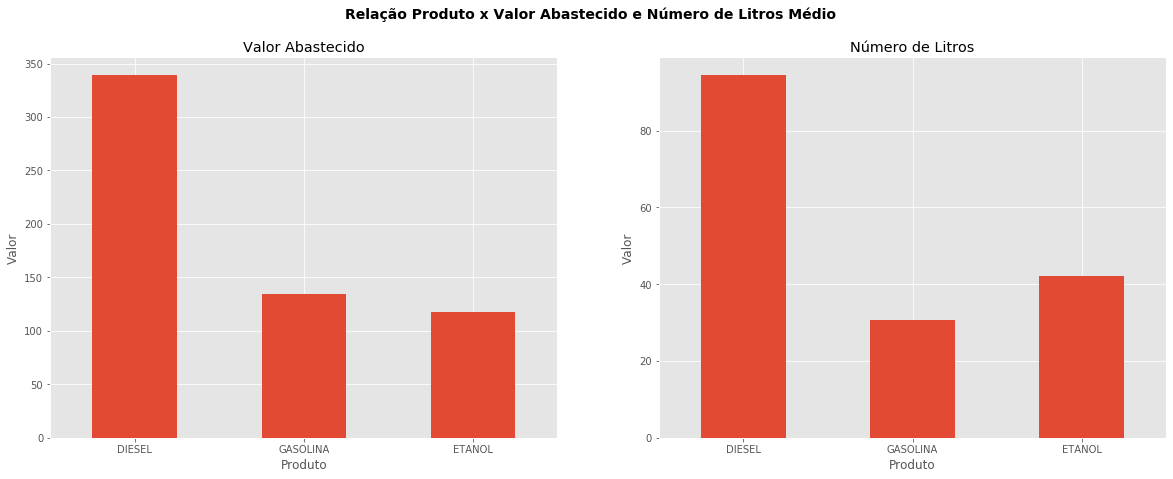

In [27]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'mean', 'Nr Litros': 'mean'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros Médio', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

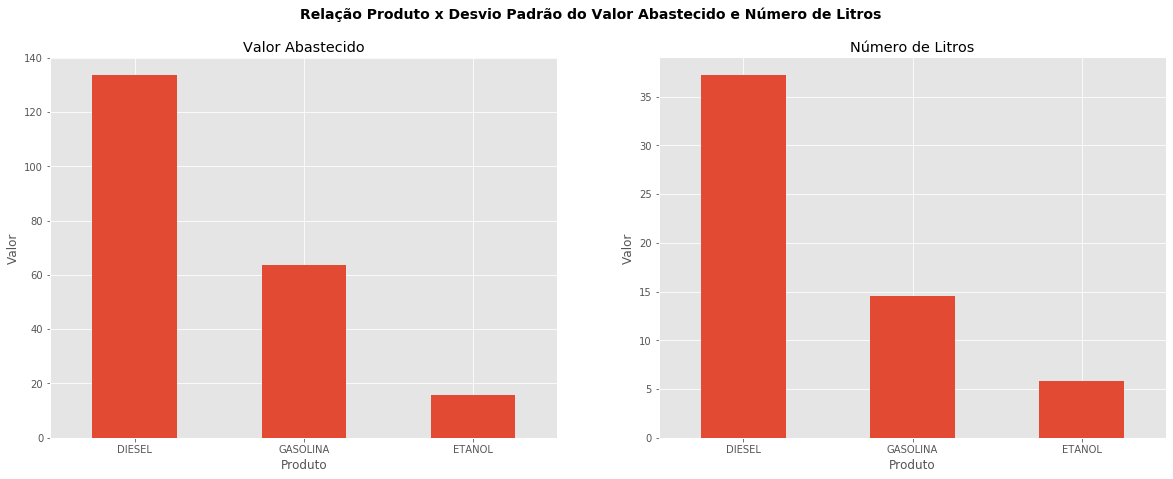

In [28]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'std', 'Nr Litros': 'std'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Desvio Padrão do Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)